In [168]:
import pandas as pd

In [169]:
# Do not run this cell, it has been used to create the csv file
# import json
# 
# with open('./datas/heroes.json') as f:
#   data = json.load(f)
# 
# df = pd.DataFrame(columns=['Hero', 'Rank', 'Season', 'Stat', 'Value'])
# 
# for hero, hero_data in data.items():
#     name = hero_data['name']
#     for rank, rank_data in hero_data['stats'].items():
#         for season, season_data in rank_data.items():
#             for stat, value in season_data.items():
#                 print(f'{name} - {rank} - {season} - {stat} - {value}')
#                 df = df._append({'Hero': name, 'Rank': rank, 'Season': season, 'Stat': stat, 'Value': value}, ignore_index=True)
# print(df)
# df.to_csv('./results/heroes.csv', index=False)

In [170]:
df = pd.read_csv('./results/heroes.csv')
print(df)

            Hero         Rank  Season                   Stat         Value  \
0            ana          all  ow1s03              KDA Ratio          1.19   
1            ana          all  ow1s03              Pick Rate         3.88%   
2            ana          all  ow1s03               Win Rate        37.61%   
3            ana          all  ow1s03           Eliminations   8.90/ 10min   
4            ana          all  ow1s03        Objective Kills   3.58/ 10min   
...          ...          ...     ...                    ...           ...   
124469  ramattra  grandmaster  ow2s08        Weapon Accuracy           25%   
124470  ramattra  grandmaster  ow2s08        Pummel Accuracy           67%   
124471  ramattra  grandmaster  ow2s08           Pummel Kills  12.49/ 10min   
124472  ramattra  grandmaster  ow2s08  Ravenous Vortex Kills   6.55/ 10min   
124473  ramattra  grandmaster  ow2s08     Annihilation Kills   4.52/ 10min   

        Season Index Parsed Stat  
0                  3        

In [171]:
def get_season_index(season_string: str):
    last_season_ow1 = 36
    game_version = int(season_string[2])
    season_number = int(season_string[4:])
    return (game_version - 1) * last_season_ow1 + season_number

In [172]:
# add to dataframe the column 'Season Index' with the index of the season
df['Season Index'] = df['Season'].apply(get_season_index)
print(df.columns)

Index(['Hero', 'Rank', 'Season', 'Stat', 'Value', 'Season Index',
       'Parsed Stat'],
      dtype='object')


In [173]:
def get_parsed_stat(stat: str):
    # apply this function on a whole column to create a copy of it without '/ 10 min'
    if '/ 10min' in str(stat):
        stat = stat.replace(',', '')
        return stat[:-8]
    else:
        return stat
    

df['Parsed Stat'] = df['Value'].apply(get_parsed_stat)    

In [174]:
# save the dataframe to a csv file
df.to_csv('./results/heroes.csv', index=False)
df = pd.read_csv('./results/heroes.csv')
print(df)

            Hero         Rank  Season                   Stat         Value  \
0            ana          all  ow1s03              KDA Ratio          1.19   
1            ana          all  ow1s03              Pick Rate         3.88%   
2            ana          all  ow1s03               Win Rate        37.61%   
3            ana          all  ow1s03           Eliminations   8.90/ 10min   
4            ana          all  ow1s03        Objective Kills   3.58/ 10min   
...          ...          ...     ...                    ...           ...   
124469  ramattra  grandmaster  ow2s08        Weapon Accuracy           25%   
124470  ramattra  grandmaster  ow2s08        Pummel Accuracy           67%   
124471  ramattra  grandmaster  ow2s08           Pummel Kills  12.49/ 10min   
124472  ramattra  grandmaster  ow2s08  Ravenous Vortex Kills   6.55/ 10min   
124473  ramattra  grandmaster  ow2s08     Annihilation Kills   4.52/ 10min   

        Season Index Parsed Stat  
0                  3        

In [175]:
# get every hero sort by name
heroes = df['Hero'].unique()
heroes = sorted(heroes)
print(heroes)

['ana', 'ashe', 'baptiste', 'bastion', 'brigitte', 'cassidy', 'doomfist', 'dva', 'echo', 'genji', 'hanzo', 'illari', 'junker-queen', 'junkrat', 'kiriko', 'lifeweaver', 'lucio', 'mei', 'mercy', 'moira', 'orisa', 'pharah', 'ramattra', 'reaper', 'reinhardt', 'roadhog', 'sigma', 'sojourn', 'soldier-76', 'sombra', 'symmetra', 'torbjorn', 'tracer', 'widowmaker', 'winston', 'wrecking-ball', 'zarya', 'zenyatta']


In [176]:
# get every Stat 'Win Rate' for 'ana'
ana = df[df['Hero'] == 'ana']
ana_win_rate = ana[ana['Stat'] == 'Win Rate']
print(ana_win_rate)

     Hero         Rank  Season      Stat    Value  Season Index Parsed Stat
2     ana          all  ow1s03  Win Rate   37.61%             3      37.61%
16    ana          all  ow1s05  Win Rate  Unknown             5     Unknown
30    ana          all  ow1s06  Win Rate  Unknown             6     Unknown
44    ana          all  ow1s08  Win Rate   17.24%             8      17.24%
58    ana          all  ow1s09  Win Rate   36.84%             9      36.84%
...   ...          ...     ...       ...      ...           ...         ...
4076  ana  grandmaster  ow2s03  Win Rate   54.96%            39      54.96%
4090  ana  grandmaster  ow2s04  Win Rate   47.94%            40      47.94%
4104  ana  grandmaster  ow2s05  Win Rate   41.75%            41      41.75%
4118  ana  grandmaster  ow2s06  Win Rate   48.89%            42      48.89%
4132  ana  grandmaster  ow2s08  Win Rate   50.13%            44      50.13%

[296 rows x 7 columns]


In [177]:
import matplotlib.pyplot as plt
import numpy as np


def plot_character_stats_by_rank(character: str, stat: str, rank: str):
    # get the data
    character_df = df[df['Hero'] == character]
    character_stat = character_df[character_df['Stat'] == stat]
    character_stat_rank = character_stat[character_stat['Rank'] == rank].sort_values(by='Value')
    character_stat_rank = character_stat_rank[character_stat_rank['Value'] != 'Unknown']
    character_stat_rank['Value'] = character_stat_rank['Value'].apply(lambda x: float(x[:-1]))

    # create the plot
    plt.figure(figsize=(10, 5))
    plt.bar(character_stat_rank['Season Index'], character_stat_rank['Value'], width=1)
    plt.xticks(np.arange(0, 45, 2))
    plt.xlabel('Season')
    plt.ylabel(stat)
    plt.title(f'{stat} for {character} in {rank} Rank')
    plt.show()

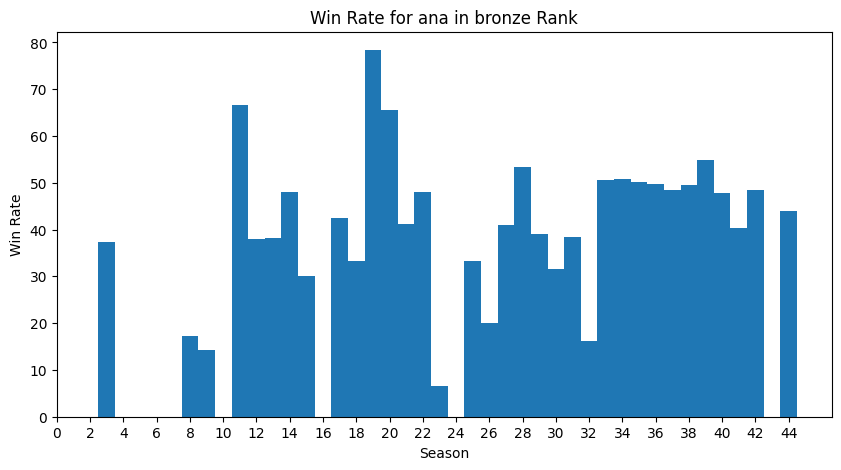

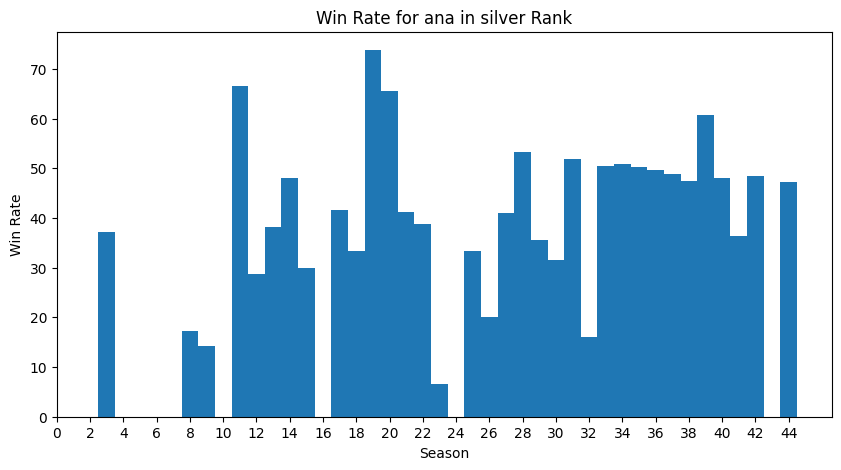

In [178]:
plot_character_stats_by_rank('ana', 'Win Rate', 'bronze')
plot_character_stats_by_rank('ana', 'Win Rate', 'silver')

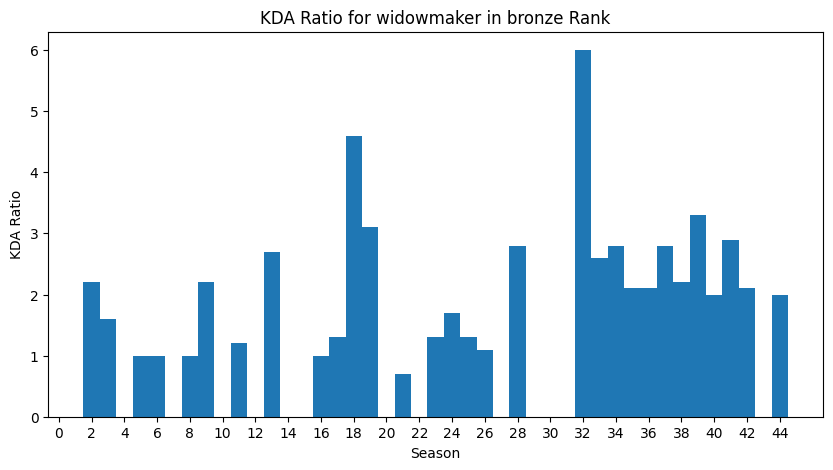

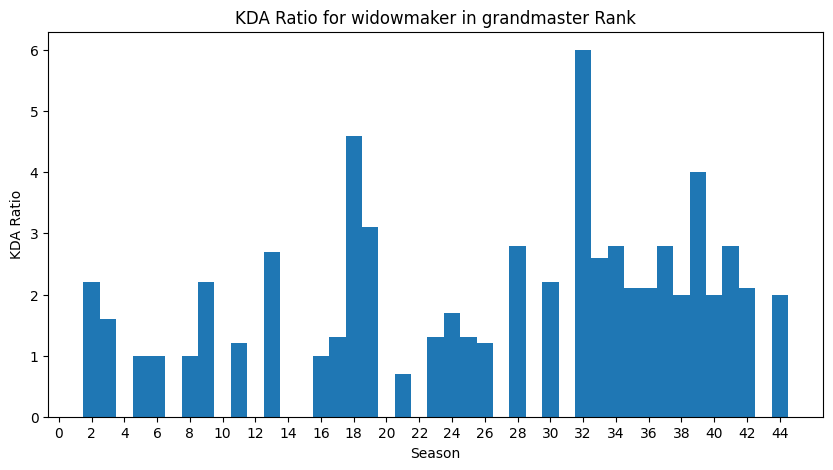

In [179]:
plot_character_stats_by_rank('widowmaker', 'KDA Ratio', 'bronze')
plot_character_stats_by_rank('widowmaker', 'KDA Ratio', 'grandmaster')

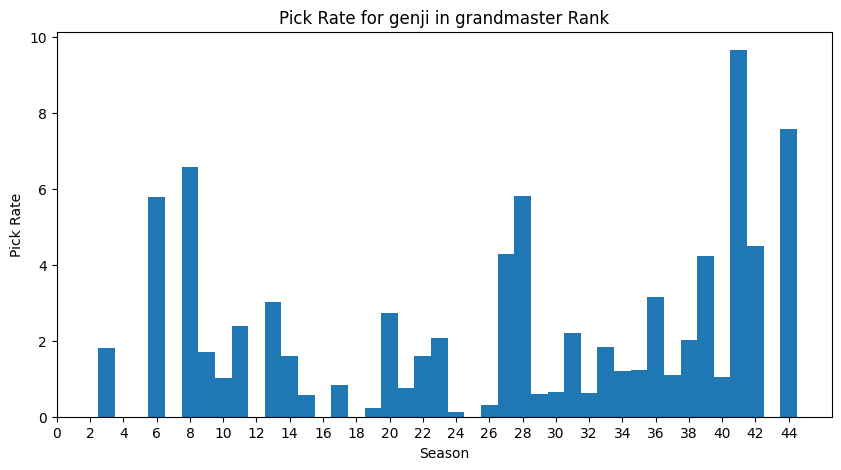

In [180]:
plot_character_stats_by_rank('genji', 'Pick Rate', 'grandmaster')

In [181]:
# todo: use this to compare 2 stats for a character (example: 'ana', 'Win Rate', 'grandmaster' and 'ana', 'Win Rate', 'bronze') 
#  you need to use 2 bars for each season, one for each stat, and you need to use different colors for each stat
def merge_plot_character_stats_by_rank(character1: str, stat1: str, rank1: str, character2: str, stat2: str, rank2: str,
                                       limit: int = 44):
    # get the data
    character_df1 = df[df['Hero'] == character1]
    character_stat1 = character_df1[character_df1['Stat'] == stat1]
    character_stat_rank1 = character_stat1[character_stat1['Rank'] == rank1].sort_values(by='Parsed Stat')
    character_stat_rank1 = character_stat_rank1[character_stat_rank1['Parsed Stat'] != 'Unknown']
    character_stat_rank1['Parsed Stat'] = character_stat_rank1['Parsed Stat'].apply(lambda x: float(x[:-1]))

    character_df2 = df[df['Hero'] == character2]
    character_stat2 = character_df2[character_df2['Stat'] == stat2]
    character_stat_rank2 = character_stat2[character_stat2['Rank'] == rank2].sort_values(by='Parsed Stat')
    character_stat_rank2 = character_stat_rank2[character_stat_rank2['Parsed Stat'] != 'Unknown']
    character_stat_rank2['Parsed Stat'] = character_stat_rank2['Parsed Stat'].apply(lambda x: float(x[:-1]))

    # create the plot
    fig, ax1 = plt.subplots()
    ax1.bar(character_stat_rank1['Season Index'], character_stat_rank1['Parsed Stat'], width=1, color='blue')
    ax1.set_ylabel(f'{rank1} {character1} {stat1}', color='blue')
    ax1.set_xlabel('Season')
    ax2 = ax1.twinx()
    ax2.bar(character_stat_rank2['Season Index'], character_stat_rank2['Parsed Stat'], width=1, color='r')  
    ax2.set_ylabel(f'{rank2} {character2} {stat2}', color='r')
    ax1.set_title(f'{stat1} and {stat2} comparison')
    ax1.set_xlim(0,limit)
    ax1.grid()
    fig.tight_layout()
    # add legend
    plt.legend([stat1, stat2])
    plt.show()

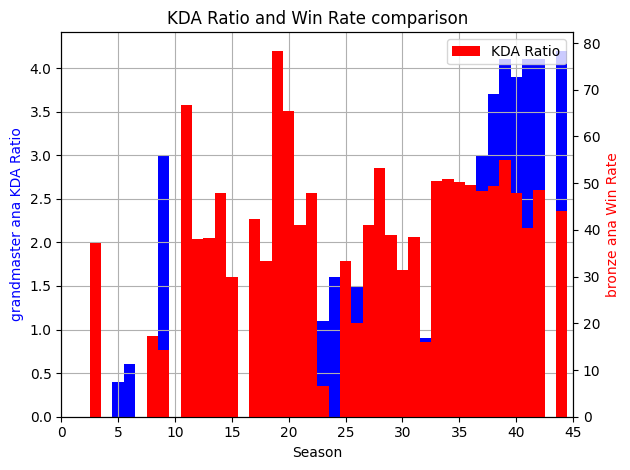

In [182]:
merge_plot_character_stats_by_rank('ana', 'KDA Ratio', 'grandmaster', 'ana', 'Win Rate', 'bronze', limit=45)

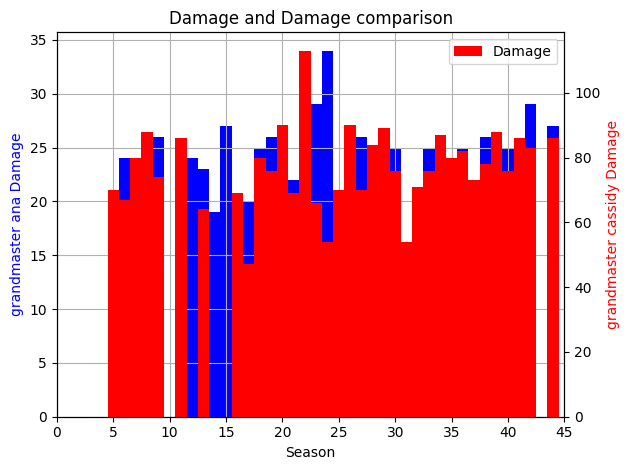

In [185]:
merge_plot_character_stats_by_rank('ana', 'Damage', 'grandmaster', 'cassidy', 'Damage', 'grandmaster', limit=45)